### HuggingFace API

In [27]:
from google.colab import userdata
API_TOKEN=userdata.get('Huggingface')

In [28]:
import requests
import json

In [29]:
model_id = "google/gemma-7b"
API_URL = "https://api-inference.huggingface.co/models/google/gemma-7b"

In [30]:
headers = {"Authorization": f"Bearer {API_TOKEN}"}

In [31]:
def query(payload):
  response=requests.post(API_URL,headers=headers,json=payload)
  print(response)
  return response.json()

In [32]:
question={
	"inputs": "can you let me about the capital of india",
}

question1={
    "inputs" : "tell me the cricketer name who is having a century in T20 WC",
}

In [33]:
output = query(question1)
print(output[0]["generated_text"])

<Response [200]>
tell me the cricketer name who is having a century in T20 WC

Answer:  

Step 1/4
1. Who is the cricketer name? We don't know yet.

Step 2/4
2. What is the ICC T20 World Cup? It is a cricket tournament that takes place every two years.

Step 3/4
3. When is the next T20 World Cup? It is scheduled to take place in October-November 2021 in India, but due to the COVID-


### Openai API

In [34]:
from google.colab import userdata
OPEN_API=userdata.get('Openai')

In [ ]:
OPEN_API

In [35]:
!pip install openai

In [36]:
from openai import OpenAI
import pandas as pd
client=OpenAI(api_key=OPEN_API)
client

In [37]:
models=client.models.list().data
models[0]

Model(id='dall-e-3', created=1698785189, object='model', owned_by='system')

In [38]:
allmodels=pd.DataFrame(models,columns=["id","created","object","owned_by"])
allmodels

,id,created,object,owned_by
0,"(id, dall-e-3)","(created, 1698785189)","(object, model)","(owned_by, system)"
1,"(id, whisper-1)","(created, 1677532384)","(object, model)","(owned_by, openai-internal)"
2,"(id, tts-1)","(created, 1681940951)","(object, model)","(owned_by, openai-internal)"
3,"(id, dall-e-2)","(created, 1698798177)","(object, model)","(owned_by, system)"
4,"(id, tts-1-hd-1106)","(created, 1699053533)","(object, model)","(owned_by, system)"
5,"(id, tts-1-hd)","(created, 1699046015)","(object, model)","(owned_by, system)"
6,"(id, text-embedding-3-small)","(created, 1705948997)","(object, model)","(owned_by, system)"
7,"(id, text-embedding-3-large)","(created, 1705953180)","(object, model)","(owned_by, system)"
8,"(id, babbage-002)","(created, 1692634615)","(object, model)","(owned_by, system)"
9,"(id, gpt-3.5-turbo-0125)","(created, 1706048358)","(object, model)","(owned_by, system)"


In [ ]:
response=client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[


              {"role":"system","content":"you are a funny assistant who describe everything in funniest way"},
              {"role":"user","content":"compose a poem for the indian people"}


    ]
)

In [ ]:
print(response.choices[0].message.content)

In [ ]:
# image generaiton

response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)

In [ ]:
response = client.images.generate(
  model="dall-e-3",
  prompt="can you generate one crative and allegent thumbnil for my youtube vide which no has seen so far topic name of the youtube video is mlops",
  size="1024x1024",
  quality="standard",
  n=1,
)


In [ ]:
image_url = response.data[0].url

In [ ]:
image_url

### Google API

In [43]:
from google.colab import userdata
GOOGLE_API=userdata.get('Googleapi')

In [ ]:
GOOGLE_API

In [58]:
import google.generativeai as genai
import PIL.Image

genai.configure(api_key=GOOGLE_API)

In [48]:
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [49]:
for models in genai.list_models():
  if "generateContent" in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [53]:
model_text=genai.GenerativeModel("gemini-1.0-pro")
response=model_text.generate_content("what is a capital of india and give me a sweet pe on capital of india")
print(response.text)

**Capital of India:** New Delhi

**Sweet Poem on the Capital of India:**

In the heart of the land, so grand and old,
Where history unfolds, a tale to be told.
Delhi, the capital, a city of dreams,
Where the past and the future, intertwine seamlessly.

The Red Fort stands tall, a symbol of might,
Where emperors ruled, with wisdom and light.
The India Gate, a monument so grand,
To honor the brave, who fought for the land.

The Qutub Minar, a tower so high,
Reaching towards the heavens, touching the sky.
The Akshardham Temple, a sight to behold,
A sanctuary of peace, where stories are told.

Delhi's streets buzz with life and grace,
From the bustling bazaars to the serene embrace.
Connaught Place, a shopper's paradise,
Where treasures are found, at a fair price.

The Lotus Temple, shaped like a flower,
A symbol of unity, with boundless power.
The National Museum, a treasure-trove of art,
Where history and culture, fuse with each part.

Delhi, the heart of India, so proud and true,
A city

In [54]:
response.candidates

[content {
  parts {
    text: "**Capital of India:** New Delhi\n\n**Sweet Poem on the Capital of India:**\n\nIn the heart of the land, so grand and old,\nWhere history unfolds, a tale to be told.\nDelhi, the capital, a city of dreams,\nWhere the past and the future, intertwine seamlessly.\n\nThe Red Fort stands tall, a symbol of might,\nWhere emperors ruled, with wisdom and light.\nThe India Gate, a monument so grand,\nTo honor the brave, who fought for the land.\n\nThe Qutub Minar, a tower so high,\nReaching towards the heavens, touching the sky.\nThe Akshardham Temple, a sight to behold,\nA sanctuary of peace, where stories are told.\n\nDelhi\'s streets buzz with life and grace,\nFrom the bustling bazaars to the serene embrace.\nConnaught Place, a shopper\'s paradise,\nWhere treasures are found, at a fair price.\n\nThe Lotus Temple, shaped like a flower,\nA symbol of unity, with boundless power.\nThe National Museum, a treasure-trove of art,\nWhere history and culture, fuse with eac

In [55]:
response.parts[0]

text: "**Capital of India:** New Delhi\n\n**Sweet Poem on the Capital of India:**\n\nIn the heart of the land, so grand and old,\nWhere history unfolds, a tale to be told.\nDelhi, the capital, a city of dreams,\nWhere the past and the future, intertwine seamlessly.\n\nThe Red Fort stands tall, a symbol of might,\nWhere emperors ruled, with wisdom and light.\nThe India Gate, a monument so grand,\nTo honor the brave, who fought for the land.\n\nThe Qutub Minar, a tower so high,\nReaching towards the heavens, touching the sky.\nThe Akshardham Temple, a sight to behold,\nA sanctuary of peace, where stories are told.\n\nDelhi\'s streets buzz with life and grace,\nFrom the bustling bazaars to the serene embrace.\nConnaught Place, a shopper\'s paradise,\nWhere treasures are found, at a fair price.\n\nThe Lotus Temple, shaped like a flower,\nA symbol of unity, with boundless power.\nThe National Museum, a treasure-trove of art,\nWhere history and culture, fuse with each part.\n\nDelhi, the hea

In [56]:
model_image=genai.GenerativeModel("gemini-1.0-pro-vision-latest")

In [57]:
!curl -o image.jpg "https://www.hindustantimes.com/ht-img/img/2023/03/24/550x309/robert-lukeman-zNN6ubHmruI-unsplash_1679659189331_1679659234951_1679659234951.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  145k  100  145k    0     0  84156      0  0:00:01  0:00:01 --:--:-- 84133


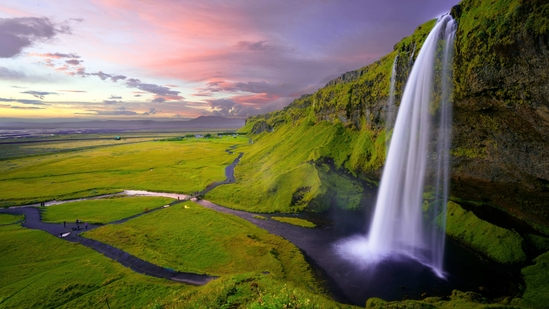

In [59]:
PIL.Image.open("image.jpg")

In [60]:
image=PIL.Image.open("image.jpg")
model_image.generate_content(image).text

' This is a photo of a waterfall in Iceland. The waterfall is called Skógafoss and it is located on the south coast of Iceland. It is one of the most popular tourist destinations in Iceland.'